In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from IPython.display import display

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import RobustScaler, Normalizer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.model_selection import KFold
from sklearn.metrics import PrecisionRecallDisplay
import statistics
from sklearn.preprocessing import PolynomialFeatures

In [13]:
# poly = PolynomialFeatures(degree=2, interaction_only=True)

In [16]:
list_preds=[]
col_names=['fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
path_train = 'train.csv'
data = pd.read_csv(path_train)
data_no_na = data.dropna(axis=0, subset=['fixed acidity', 'volatile acidity', 'pH', 'sulphates'])
only_na = data[~data.index.isin(data_no_na.index)]
data_no_na['wine_class'] = data_no_na['quality'].apply(lambda x: 0 if x < 7 else 1)
no_duplicates = data_no_na.drop_duplicates(keep='first')
only_duplicates = data_no_na[~data_no_na.index.isin(no_duplicates.index)]
# for j in col_names:
#     list_preds=[]
#     for i in range(10):
#         train_data, test_data, train_target, target_test = train_test_split(no_duplicates.drop(axis=1, columns=['wine_class']), pd.DataFrame(no_duplicates.wine_class), test_size=0.3,
#                                                                         stratify=pd.DataFrame(no_duplicates['wine_class']), shuffle=True)
#         z = stats.zscore(train_data)
#         train_data_clean = train_data.drop(axis=1, columns=['citric acid', 'alcohol', 'total sulfur dioxide', j])#[~(np.abs(z) > 3).any(axis=1)]
#         train_data_clean.reset_index(inplace=True, drop=True)
#         target_train = pd.DataFrame(train_data_clean['quality'].apply(lambda x: 0 if x < 7 else 1))
#         features_train = train_data_clean.drop(axis=1, columns=['quality'])
#         features_test = test_data.drop(axis=1, columns=['quality', 'citric acid', 'alcohol', 'total sulfur dioxide', j])
#         pipe_1 = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=31, p=2, weights='distance', n_jobs=-1))
#         pipe_1.fit(features_train,target_train.values.ravel())
#         list_preds.append(precision_score(target_test, pipe_1.predict(features_test), zero_division=0))
#     print(f'Дроп строки {j}...скор: {sum(list_preds)/10}')
#     print(f'Стандартое отклонение {statistics.stdev(list_preds)}')
#     del list_preds

no_citr=[]
for i in range(1000):
        train_data, test_data, train_target, target_test = train_test_split(no_duplicates.drop(axis=1, columns=['wine_class']), pd.DataFrame(no_duplicates.wine_class), test_size=0.3,
                                                                        stratify=pd.DataFrame(no_duplicates['wine_class']), shuffle=True)
        z = stats.zscore(train_data)
        train_data_clean = train_data.drop(axis=1, columns=['citric acid', 'alcohol', 'total sulfur dioxide'])#[~(np.abs(z) > 3).any(axis=1)]
        train_data_clean.reset_index(inplace=True, drop=True)
        target_train = pd.DataFrame(train_data_clean['quality'].apply(lambda x: 0 if x < 7 else 1))
        features_train = train_data_clean.drop(axis=1, columns=['quality'])
        features_test = test_data.drop(axis=1, columns=['quality', 'citric acid', 'alcohol', 'total sulfur dioxide'])
        pipe_1 = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=30, p=4, weights='distance', n_jobs=-1))
        pipe_1.fit(features_train,target_train.values.ravel())
        no_citr.append(precision_score(target_test, pipe_1.predict(features_test), zero_division=0))
print(f'Дроп строки citric ...скор: {sum(no_citr)/1000}')
print(f'Стандартое отклонение {statistics.stdev(no_citr)}')
# print(no_citr[:-20])

C:\Users\Arseny\AppData\Local\Temp\ipykernel_12372\4046186169.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_na['wine_class'] = data_no_na['quality'].apply(lambda x: 0 if x < 7 else 1)


Дроп строки citric ...скор: 0.7259344738594743
Стандартое отклонение 0.18611131806830045


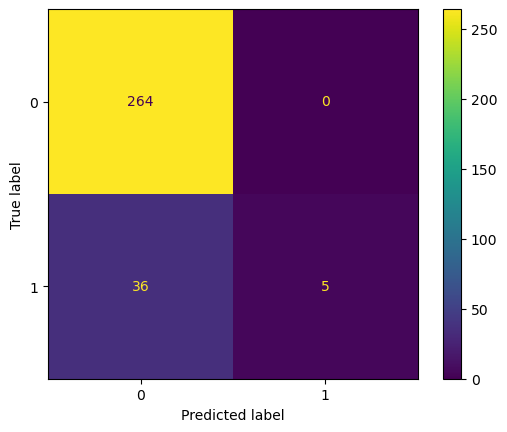

In [4]:
matrix = confusion_matrix(target_test, pipe_1.predict(features_test))
ConfusionMatrixDisplay(matrix).plot()

Правильность модели на тестовом наборе: 1.000000

recall:  0.268  precision:, 0.579  thresholds:,0.382
recall:  0.122  precision:, 0.833  thresholds:,0.489


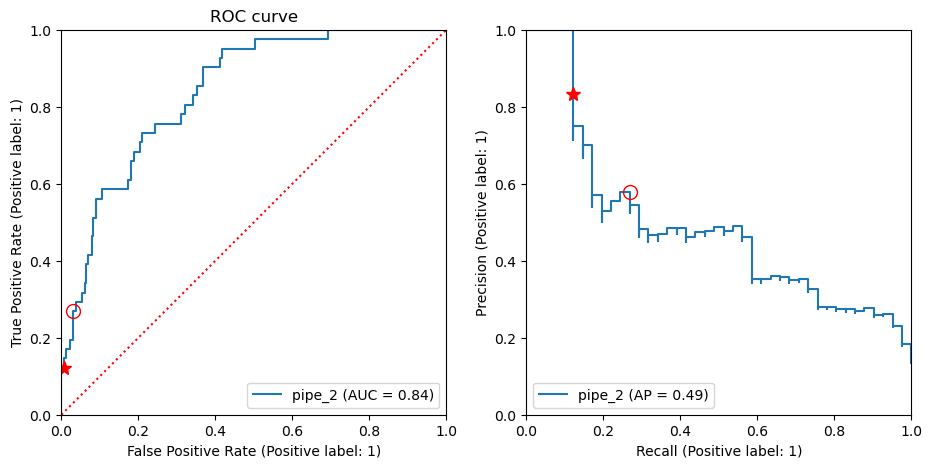

In [5]:
print("Правильность модели на тестовом наборе: {:.6f}\n".format(precision_score(target_test, pipe_1.predict(features_test))))


def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx
fpr, tpr, thresholds = roc_curve(target_test, pipe_1.predict_proba(features_test)[:,1], pos_label = None)
pos = 10
point = find_nearest(thresholds,0.5)
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(11, 5))
RocCurveDisplay.from_estimator(pipe_1, features_test, target_test, name = 'pipe_2', ax=ax1)
ax1.set_title("ROC curve")
ax1.plot([0,1],[0,1], color="r", ls=":")
ax1.plot(fpr[point],tpr[point], '*', markersize=10, color="r")
ax1.plot(fpr[pos],tpr[pos], 'o', markersize=10,  mfc='none', color="r");
ax1.set_xlim((0, 1))
ax1.set_ylim((0, 1))
precision, recall, thresholds_pr = precision_recall_curve(target_test, pipe_1.predict_proba(features_test)[:,1], pos_label = None)
PrecisionRecallDisplay.from_estimator(pipe_1, features_test, target_test, name = 'pipe_2', ax=ax2)
point_pr = find_nearest(thresholds_pr,0.5)
pos_pr = find_nearest(thresholds_pr,thresholds[pos])
ax2.plot(recall[point_pr],precision[point_pr], '*', markersize=10, color="r")
ax2.plot(recall[pos_pr],precision[pos_pr], 'o', markersize=10,  mfc='none', color="r");
ax2.set_xlim((0, 1))
ax2.set_ylim((0, 1))
print( f'recall:  {recall[pos_pr]:.3f}', f' precision:, {precision[pos_pr]:.3f}', f' thresholds:,{thresholds[pos]:.3f}')
print( f'recall:  {recall[point_pr]:.3f}', f' precision:, {precision[point_pr]:.3f}', f' thresholds:,{thresholds[point]:.3f}')